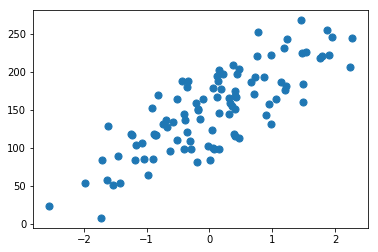

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
plt.figure()
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1,bias=150,noise=30,random_state=0 )
# The bias term in the underlying linear model
# The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
# n_features :特征个数= n_informative（） + n_redundant + n_repeated
plt.scatter(X_R1,y_R1,marker='o',s=50)
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


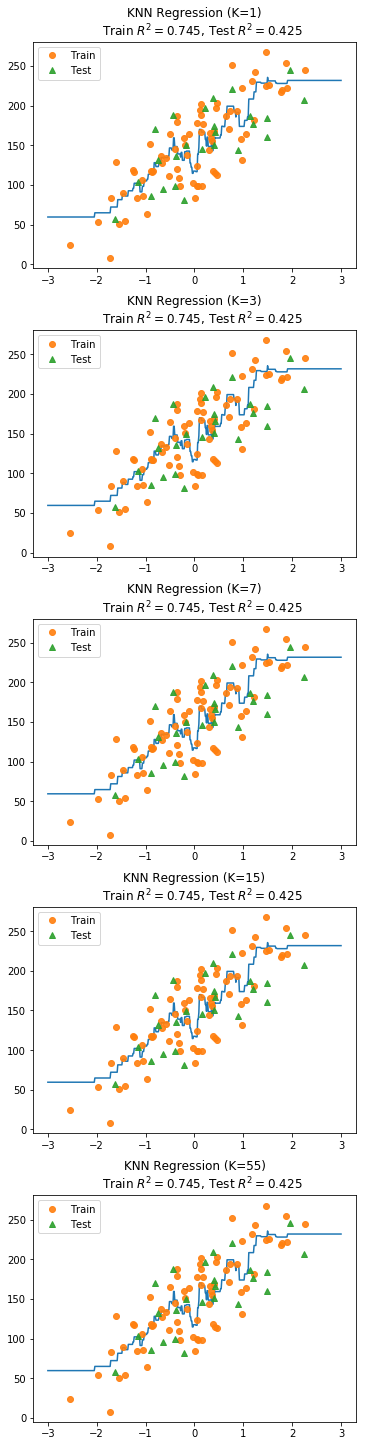

In [25]:
fig,subaxes = plt.subplots(5,1,figsize=(5,20))
X_predict_input = np.linspace(-3,3,500).reshape(-1,1)
for thisaxis,K in zip(subaxes,[1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train,y_train)
    test_score = knnreg.score(X_test,y_test)
    thisaxis.plot(X_predict_input,y_predict_output)
    thisaxis.plot(X_train,y_train,'o',alpha=0.9,label='Train')
    thisaxis.plot(X_test,y_test,'^',alpha=0.9,label='Test')
    thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$, Test $R^2 = {:.3f}$'.format(K,train_score,test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)